In [5]:
from keras import models
from keras import layers
from keras import optimizers
from keras.datasets import mnist
from keras.utils import to_categorical

In [6]:
(train_images,train_labels),(test_images,test_labels) = mnist.load_data()

# data reshape
train_images = train_images.reshape((60000,28*28))
train_images = train_images.astype('float32') / 255.

test_images = test_images.reshape((10000,28*28))
test_images = test_images.astype('float32') / 255.

# one hot encoding
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [7]:
model = models.Sequential() # model 객체생성
model.add(layers.Dense(32,input_shape=(784,), activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

In [8]:
model.compile(optimizer=optimizers.RMSprop(lr=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'],
              )

In [32]:
hist = model.fit(x=train_images, y=train_labels, epochs=10, batch_size=100, validation_data=(test_images, test_labels))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 2s 38us/step - loss: 0.0529 - acc: 0.9844 - val_loss: 0.1046 - val_acc: 0.9713
Epoch 2/10
60000/60000 [==============================] - 2s 39us/step - loss: 0.0520 - acc: 0.9843 - val_loss: 0.1035 - val_acc: 0.9718
Epoch 3/10
60000/60000 [==============================] - 2s 40us/step - loss: 0.0504 - acc: 0.9848 - val_loss: 0.1090 - val_acc: 0.9705
Epoch 4/10
60000/60000 [==============================] - 2s 39us/step - loss: 0.0494 - acc: 0.9853 - val_loss: 0.1042 - val_acc: 0.9706
Epoch 5/10
60000/60000 [==============================] - 2s 40us/step - loss: 0.0480 - acc: 0.9857 - val_loss: 0.1090 - val_acc: 0.9713
Epoch 6/10
60000/60000 [==============================] - 2s 39us/step - loss: 0.0473 - acc: 0.9857 - val_loss: 0.1080 - val_acc: 0.9697
Epoch 7/10
60000/60000 [==============================] - 2s 41us/step - loss: 0.0462 - acc: 0.9863 - val_loss: 0.1070 - val_acc

In [23]:
# test_loss, test_acc = model.evaluate(x=test_images, y=test_labels)

10000/10000 [==============================] - 0s 35us/step


In [24]:
# print("test loss : {}, test accuracy : {}".format(test_loss, test_acc))

test loss : 0.10205991732445545, test accuracy : 0.971


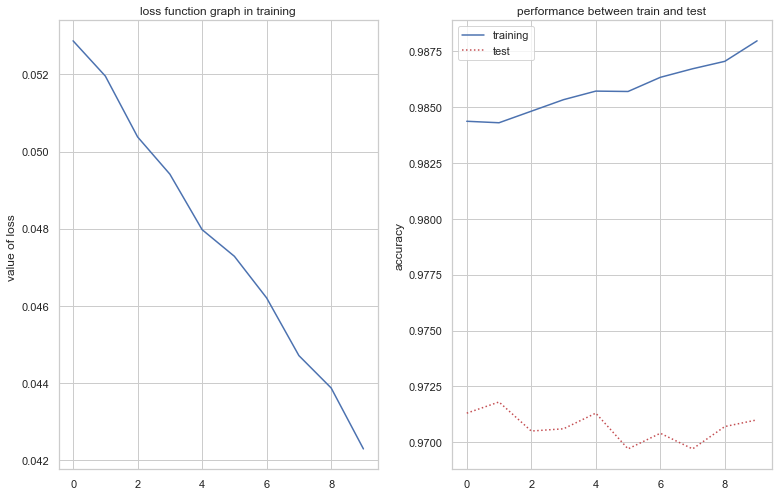

In [34]:
plt.figure(figsize=(11,7))
plt.subplot(1,2,1)
plt.plot(hist.history['loss'])
plt.title("loss function graph in training")
plt.ylabel("value of loss ")
plt.subplot(1,2,2)
plt.title("performance between train and test")
plt.ylabel("accuracy")
plt.plot(hist.history['acc'], 'b-', label="training")
plt.plot(hist.history['val_acc'], 'r:', label="test")
plt.legend()
plt.tight_layout()
plt.show()